<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
print('Hello')

Hello


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-28 13:47:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  45.1MB/s    in 0.8s    

2024-11-28 13:47:03 (45.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [10]:
QUERY = """
SELECT ConvertedComp FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

#df.hist(bins=10)

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


In [6]:
df.dropna(subset=['ConvertedComp'], inplace=True)

Text(0.5, 0, 'Value')

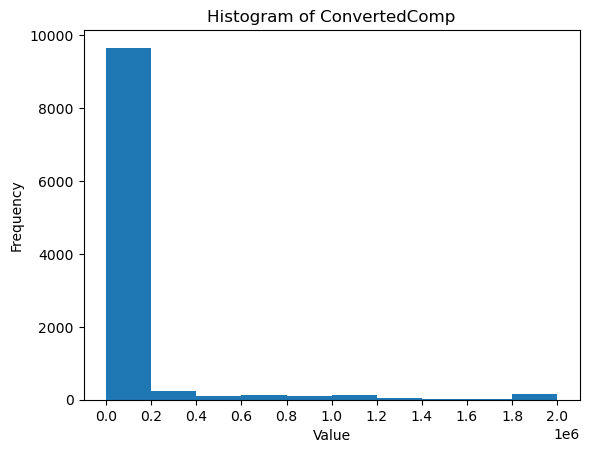

In [7]:
count, bin_edges = np.histogram(df['ConvertedComp'])
df['ConvertedComp'].plot(kind='hist', xticks = bin_edges)
plt.title('Histogram of ConvertedComp')
plt.ylabel('Frequency')
plt.xlabel('Value')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

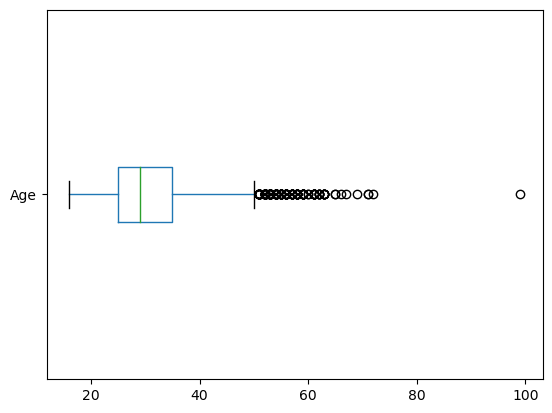

In [8]:
QUERY = """
SELECT * FROM master
"""

df = pd.read_sql_query(QUERY, conn)
#print(df['Age'])
#print(df['Age'].dtype)

# Plot the boxplot
df.boxplot(column =['Age'],grid=False, vert=False) 


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [11]:

QUERY = """
SELECT Age,WorkWeekHrs FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


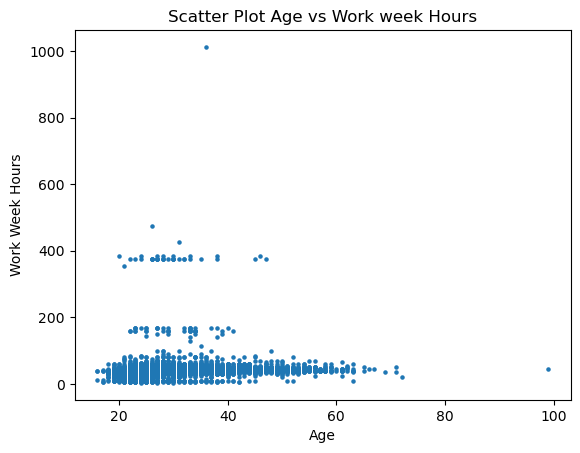

In [15]:
x = df['Age']
y = df['WorkWeekHrs']

plt.title('Scatter Plot Age vs Work week Hours')
plt.ylabel('Work Week Hours')
plt.xlabel('Age')
plt.scatter(x,y,s=5)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [16]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()



,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


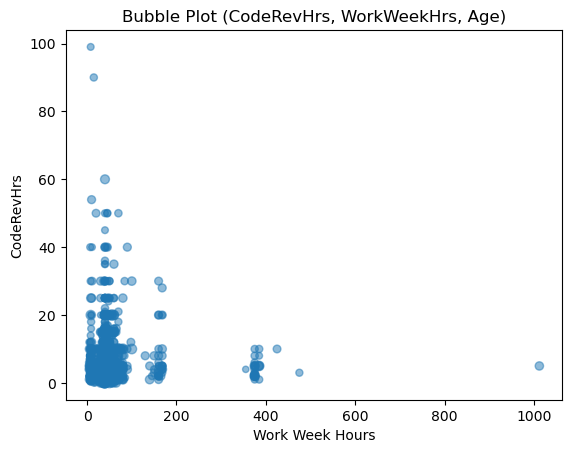

In [34]:
y = df['CodeRevHrs']
x = df['WorkWeekHrs']
z = df['Age']

plt.title('Bubble Plot (CodeRevHrs, WorkWeekHrs, Age)')
plt.xlabel('Work Week Hours')
plt.ylabel('CodeRevHrs')
plt.scatter(x,y,s=z,alpha=0.5)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


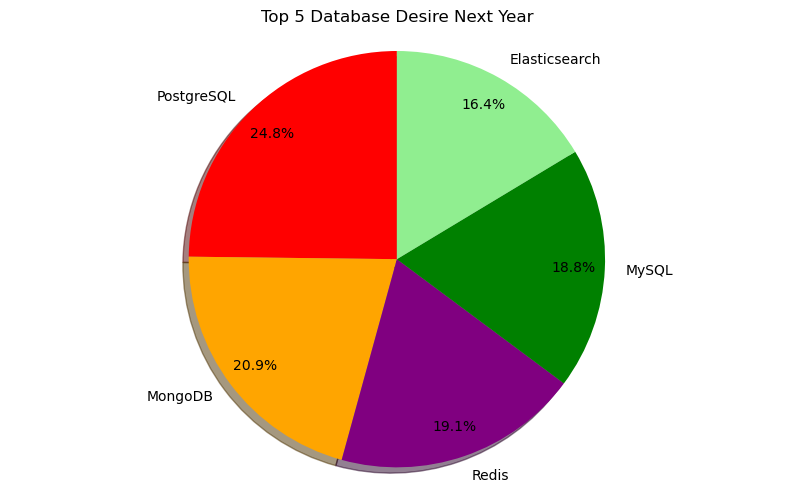

In [9]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)
df


df.set_index('DatabaseDesireNextYear', inplace=True)

color_list = ['red', 'orange', 'purple', 'green', 'lightgreen']
labels = df.index  


plt.figure(figsize=(10, 6)) 
plt.pie(df['Count'], labels=labels, colors=color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
plt.title('Top 5 Database Desire Next Year') 
plt.axis('equal') 

plt.show()



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [43]:
QUERY = """
SELECT Age, WorkWeekHrs,CodeRevHrs FROM master
WHERE Age >= 30 AND Age <= 35
ORDER BY Age ASC
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,5.0
1,30.0,50.0,4.0
2,30.0,45.0,8.0
3,30.0,40.0,4.0
4,30.0,40.0,5.0


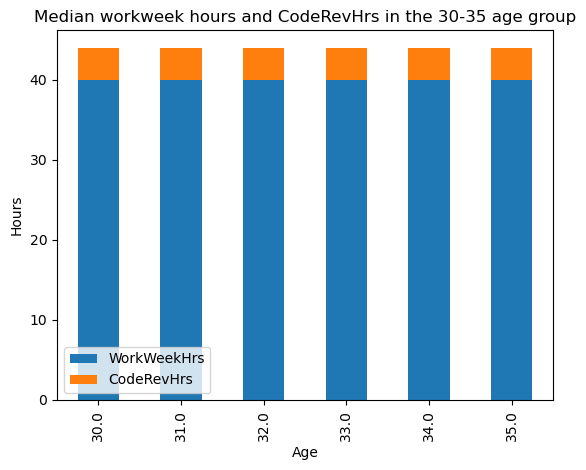

In [44]:
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df_wrkwk = pd.read_sql_query(QUERY, conn)
df_wrkwk.head()

df_graph = df_wrkwk.groupby("Age").median()
df_graph.plot(kind='bar', stacked=True)
plt.title('Median workweek hours and CodeRevHrs in the 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [65]:
QUERY = """
SELECT Age, ConvertedComp FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY,conn)
df.dropna(subset=['ConvertedComp'], inplace=True)
df.head()

,Age,ConvertedComp
0,47.0,103000.0
2,47.0,54996.0
3,47.0,62807.0
4,45.0,72522.0
5,45.0,54876.0


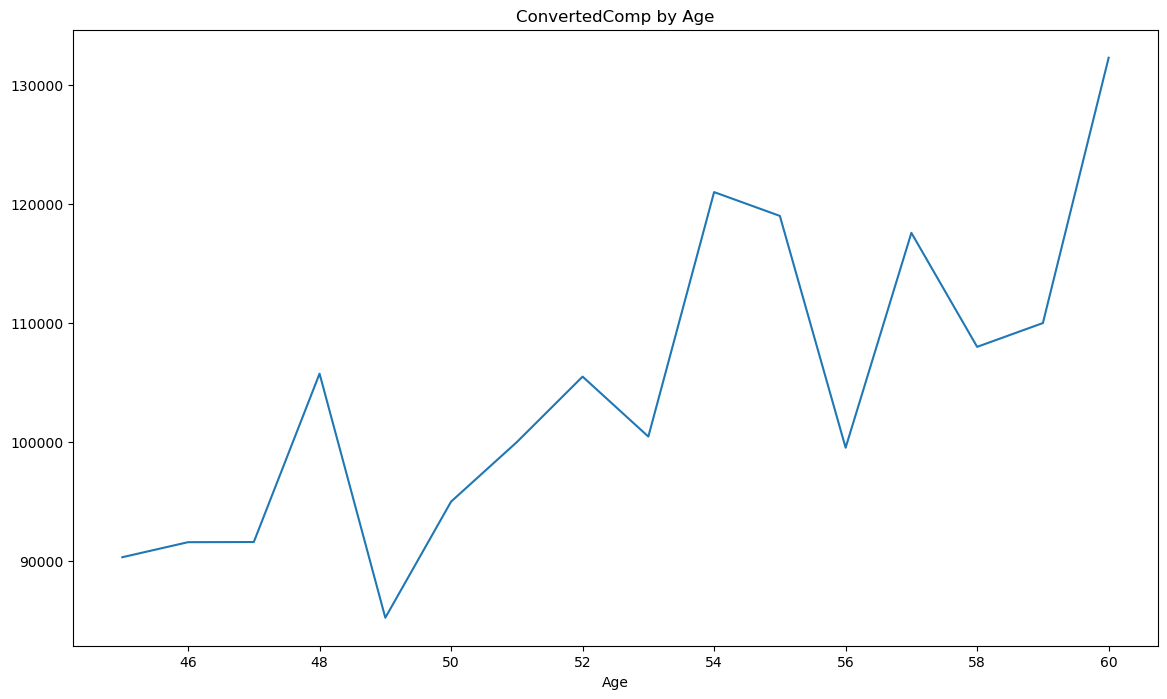

In [66]:
df.set_index('Age', inplace=True)
df.groupby('Age')['ConvertedComp'].median().plot(kind='line', figsize=(14, 8))

plt.title('ConvertedComp by Age')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


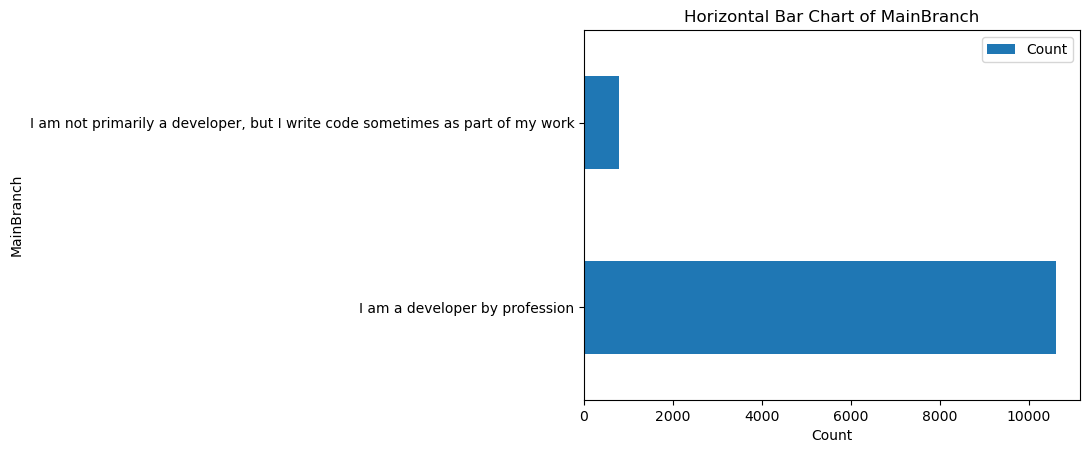

In [68]:
# Execute the SQL query and read the results into a DataFrame
QUERY = """
SELECT MainBranch, COUNT(*) as Count
FROM master
GROUP by MainBranch
"""
df = pd.read_sql_query(QUERY, conn)

# Set the MainBranch column as the index
df.set_index('MainBranch', inplace=True)

# Plotting the horizontal bar chart
df.plot(kind='barh')
plt.xlabel('Count')
plt.title('Horizontal Bar Chart of MainBranch')

plt.show()


Close the database connection.


In [69]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
